# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
city_final = []
lat = []
lng = []
max_temp = []
hum = []
cloudiness = []
wind_speed = []
country = []
date = []
record = 0
count = 1

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

for city in cities:
    record += 1
    print(f"Processing Record {record} of Set {count} | {city}")
    #print(query_url + city)
    response = requests.get(query_url + city)
    #print(response.status_code)
    if response.status_code == 200:
        response = response.json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_final.append(city)
    else: 
        print(f"City not found. Skipping...")
    if record > 49:
        record = 0
        count += 1
        time.sleep(60)
    
        


Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | inhambane
Processing Record 4 of Set 1 | sibolga
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | lake havasu city
Processing Record 8 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 1 | norman wells
Processing Record 10 of Set 1 | oyek
Processing Record 11 of Set 1 | teahupoo
Processing Record 12 of Set 1 | esperance
Processing Record 13 of Set 1 | khovu-aksy
Processing Record 14 of Set 1 | kapit
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | laguna
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | thunder bay
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | georgetown
Processing Record 23 of Set 1 | tiarei
Processing Record 24 of Set 1 

Processing Record 36 of Set 4 | edson
Processing Record 37 of Set 4 | muli
Processing Record 38 of Set 4 | isoka
Processing Record 39 of Set 4 | alghero
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | salalah
Processing Record 42 of Set 4 | saryg-sep
Processing Record 43 of Set 4 | jieshi
Processing Record 44 of Set 4 | bathsheba
Processing Record 45 of Set 4 | dikson
Processing Record 46 of Set 4 | saint-philippe
Processing Record 47 of Set 4 | vao
Processing Record 48 of Set 4 | palmer
Processing Record 49 of Set 4 | atar
Processing Record 50 of Set 4 | yingzhong
City not found. Skipping...
Processing Record 1 of Set 5 | pisco
Processing Record 2 of Set 5 | jinka
Processing Record 3 of Set 5 | malayal
Processing Record 4 of Set 5 | olafsvik
Processing Record 5 of Set 5 | zheleznogorsk
Processing Record 6 of Set 5 | yeppoon
Processing Record 7 of Set 5 | cedar city
Processing Record 8 of Set 5 | findhorn
Processing Record 9 of Set 5 | petropavlovsk-kamchatskiy


Processing Record 27 of Set 8 | honiara
Processing Record 28 of Set 8 | kupang
Processing Record 29 of Set 8 | ringebu
Processing Record 30 of Set 8 | menongue
Processing Record 31 of Set 8 | kununurra
Processing Record 32 of Set 8 | lakeway
Processing Record 33 of Set 8 | kayes
Processing Record 34 of Set 8 | apac
Processing Record 35 of Set 8 | buenos aires
Processing Record 36 of Set 8 | asilah
Processing Record 37 of Set 8 | kandiari
Processing Record 38 of Set 8 | skibbereen
Processing Record 39 of Set 8 | khatanga
Processing Record 40 of Set 8 | culaman
Processing Record 41 of Set 8 | kodinsk
Processing Record 42 of Set 8 | maningrida
Processing Record 43 of Set 8 | buchanan
Processing Record 44 of Set 8 | sakassou
Processing Record 45 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 46 of Set 8 | lalomanu
City not found. Skipping...
Processing Record 47 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 48 of Set 8 | beringovskiy
Processing Reco

Processing Record 18 of Set 12 | banff
Processing Record 19 of Set 12 | progreso
Processing Record 20 of Set 12 | oyama
Processing Record 21 of Set 12 | sibu
Processing Record 22 of Set 12 | saint-augustin
Processing Record 23 of Set 12 | kampot
Processing Record 24 of Set 12 | candelaria
Processing Record 25 of Set 12 | mount pleasant
Processing Record 26 of Set 12 | tateyama
Processing Record 27 of Set 12 | werda
Processing Record 28 of Set 12 | minsk
Processing Record 29 of Set 12 | lawrenceville
Processing Record 30 of Set 12 | tashtyp
Processing Record 31 of Set 12 | iguape
Processing Record 32 of Set 12 | tagusao
Processing Record 33 of Set 12 | port-gentil
Processing Record 34 of Set 12 | san ignacio
Processing Record 35 of Set 12 | letpadan
Processing Record 36 of Set 12 | igarka
Processing Record 37 of Set 12 | yichang
Processing Record 38 of Set 12 | tonota
Processing Record 39 of Set 12 | anastacio
Processing Record 40 of Set 12 | monte cristi
City not found. Skipping...
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City": city_final,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": hum,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()
weather_data.to_csv('Outputs/weather_data.csv')

In [5]:
humidity_count = []
humidity_count = weather_data[weather_data["Humidity"] > 100]  

In [6]:
#  Get the indices of cities that have humidity over 100%.
humidity_count.shape[0]

0

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_data = weather_data[weather_data["Humidity"] <= 100]  
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokurdakh,70.6333,147.9167,32.49,100,100,1.63,RU,1653252699
1,hithadhoo,-0.6000,73.0833,83.79,71,96,13.29,MV,1653252699
2,inhambane,-23.8650,35.3833,68.59,94,99,6.04,MZ,1653252700
3,sibolga,1.7427,98.7792,76.77,87,100,3.13,ID,1653252700
4,busselton,-33.6500,115.3333,60.64,69,75,23.53,AU,1653252700


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

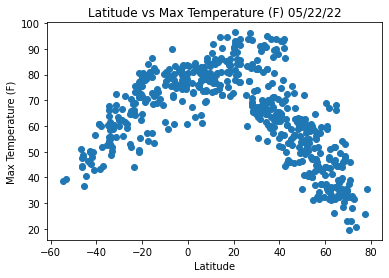

In [8]:
plt.scatter(lat, max_temp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs Max Temperature (F) 05/22/22");
plt.savefig('Outputs/Fig1.png')

## Latitude vs. Humidity Plot

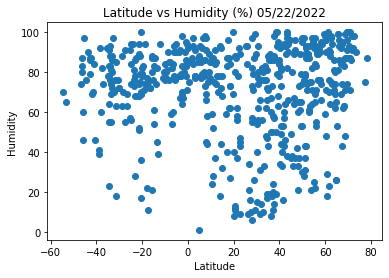

In [9]:
plt.scatter(lat, hum)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity (%) 05/22/2022");
plt.savefig('Outputs/Fig2.png')

## Latitude vs. Cloudiness Plot

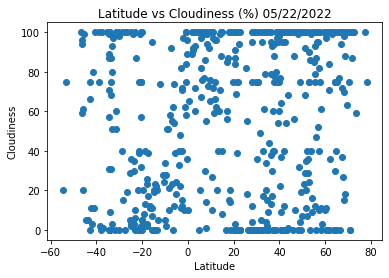

In [10]:
plt.scatter(lat, cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness (%) 05/22/2022");
plt.savefig('Outputs/Fig3.png')

## Latitude vs. Wind Speed Plot

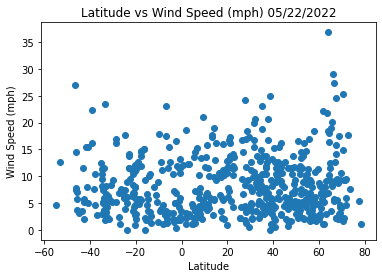

In [12]:
plt.scatter(lat, wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs Wind Speed (mph) 05/22/2022");
plt.savefig('Outputs/Fig4.png')

## Linear Regression

In [13]:
nh_df = weather_data.loc[weather_data["Lat"] >= 0]
sh_df = weather_data.loc[weather_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6541179471305731


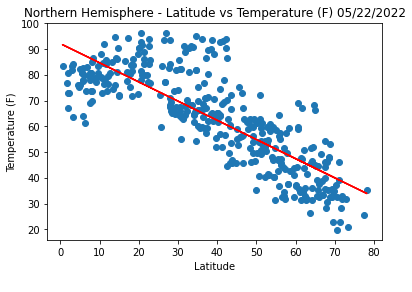

In [14]:
# Calculate and display results
x_values = nh_df["Lat"]
y_values = nh_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.annotate(line_eq,(0,0),fontsize=18)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Northern Hemisphere - Latitude vs Temperature (F) 05/22/2022")

print(f"The r-squared is: {rvalue**2}");
plt.savefig('Outputs/Fig5.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6357613697800829


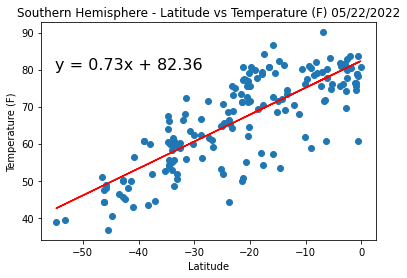

In [18]:
x_values = sh_df["Lat"]
y_values = sh_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.annotate(line_eq,(-55,80),fontsize=16)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Southern Hemisphere - Latitude vs Temperature (F) 05/22/2022")

print(f"The r-squared is: {rvalue**2}");
plt.savefig('Outputs/Fig6.png')

Observation 1:
The linear regression displayed in "Southern Hemisphere - Latitude vs Temperature (F)" shows the positive relationship with latitude coordinates and temperature. Meaning that as the location or city is closest to the equator, nearing 0 latitude, the higher the temperature will be. The slope of the line is .73, very close to 1, indicating a strong positive and direct relationship between Latitude increasing and Temperature increasing.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.017748915509997187


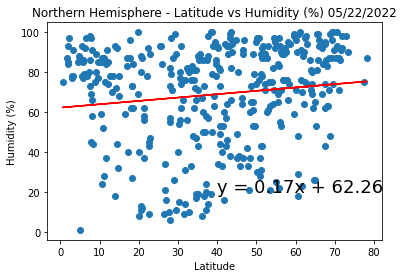

In [19]:
x_values = nh_df["Lat"]
y_values = nh_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.annotate(line_eq,(40,20),fontsize=18)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Latitude vs Humidity (%) 05/22/2022")

print(f"The r-squared is: {rvalue**2}");
plt.savefig('Outputs/Fig7.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01318562914150268


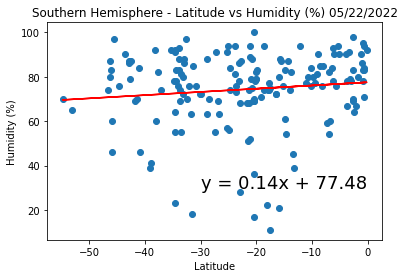

In [21]:
x_values = sh_df["Lat"]
y_values = sh_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.annotate(line_eq,(-30,30),fontsize=18)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Latitude vs Humidity (%) 05/22/2022")

print(f"The r-squared is: {rvalue**2}");
plt.savefig('Outputs/Fig8.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002029558698582199


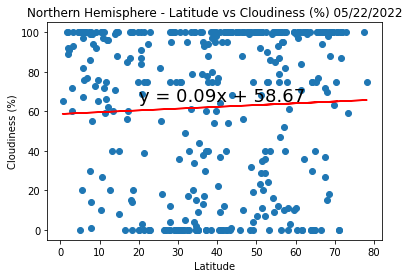

In [26]:
x_values = nh_df["Lat"]
y_values = nh_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.annotate(line_eq,(20,65),fontsize=18)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Latitude vs Cloudiness (%) 05/22/2022")

print(f"The r-squared is: {rvalue**2}");
plt.savefig('Outputs/Fig9.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.016699606667811517


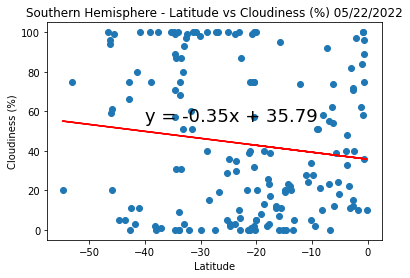

In [29]:
x_values = sh_df["Lat"]
y_values = sh_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.annotate(line_eq,(-40,55),fontsize=18)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Latitude vs Cloudiness (%) 05/22/2022")

print(f"The r-squared is: {rvalue**2}");
plt.savefig('Outputs/Fig10.png')

Observation 2: 
Based off of the graph "Southern Hemisphere - Latitude vs Cloudiness (%)", there is a slight negative relationship between latitude and cloudiness. The slop of -.35 tells us that as Latitude increases, nearing 0 at the equator, that the cloudiness % will decrease as well. This is an opposing and negative relationship, but also not a very strong relationship, indicated by the poor r-square value of 0.01 and many outliers visible in the data. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002661287803916229


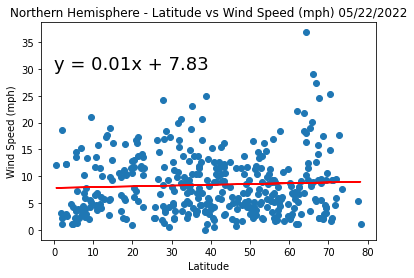

In [31]:
x_values = nh_df["Lat"]
y_values = nh_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.annotate(line_eq,(0,30),fontsize=18)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Latitude vs Wind Speed (mph) 05/22/2022")

print(f"The r-squared is: {rvalue**2}");
plt.savefig('Outputs/Fig11.png')

Observation 3:
From the image shown above labelled "Northern Hemisphere - Latitude vs Wind Speed (mph)", there appears to be almost no relationship between latitude and wind speed. The slope of nearly 0.0 indicates that as latitude increases, moving further from the equator, that the wind speed will stay the same latitudinally. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01129679421581003


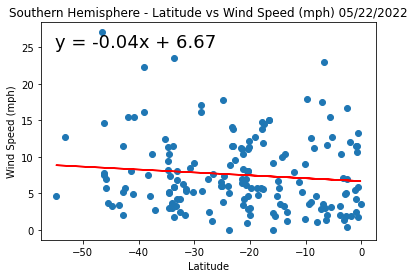

In [33]:
x_values = sh_df["Lat"]
y_values = sh_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.annotate(line_eq,(-55,25),fontsize=18)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Latitude vs Wind Speed (mph) 05/22/2022")

print(f"The r-squared is: {rvalue**2}");
plt.savefig('Outputs/Fig12.png')